In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
%matplotlib notebook

In [108]:
data = pd.read_csv("./data/train.csv", header=0)

In [109]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
data[["MSSubClass", "SalePrice"]].groupby("MSSubClass").describe().plot()

<IPython.core.display.Javascript object>

<Axes: xlabel='MSSubClass'>

In [111]:
data = data.dropna(axis=1, how="any")

In [112]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [113]:
corr = data.select_dtypes(np.number).corr()["SalePrice"]

In [114]:
corr

Id              -0.021917
MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [115]:
feature_cols = ["OverallQual", "GrLivArea", "TotalBsmtSF", "YearBuilt"]
pca = PCA(n_components=3)

In [116]:
decomposed = pca.fit_transform(data[feature_cols])

In [117]:
cm = plt.get_cmap("jet")
cNorm = matplotlib.colors.Normalize(vmin=min(data["SalePrice"]), vmax=max(data["SalePrice"]))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

In [118]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(decomposed[:, 0], decomposed[:,1], decomposed[:, 2], s=1, c=scalarMap.to_rgba(data["SalePrice"]))

<IPython.core.display.Javascript object>

In [119]:
encoder = OneHotEncoder()
cat_columns = data.select_dtypes(['object']).columns
encoded = encoder.fit_transform(data[cat_columns])

In [120]:
plt.hist(data["MSZoning"])

(array([1151.,    0.,  218.,    0.,    0.,   10.,    0.,   65.,    0.,
          16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

(array([ 76.,  98., 210., 431., 324., 161.,  66.,  33.,  10.,  14.,   5.,
          7.,   2.,   1.,   3.,   2.,   2.,   1.,   1.,   0.,   1.,   1.,
          1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1300.  ,   3439.45,   5578.9 ,   7718.35,   9857.8 ,  11997.25,
         14136.7 ,  16276.15,  18415.6 ,  20555.05,  22694.5 ,  24833.95,
         26973.4 ,  29112.85,  31252.3 ,  33391.75,  35531.2 ,  37670.65,
         39810.1 ,  41949.55,  44089.  ,  46228.45,  48367.9 ,  50507.35,
         52646.8 ,  54

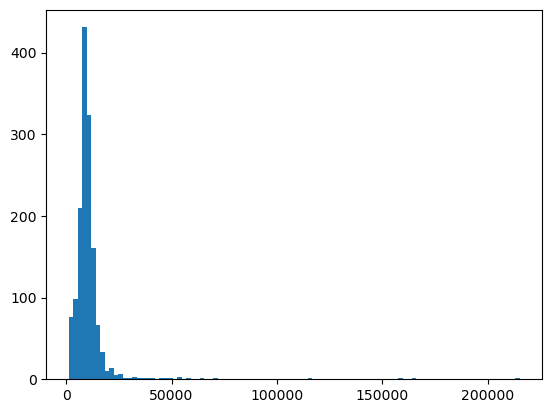

In [141]:
plt.hist(data["LotArea"], bins=100)

In [142]:
cols = ["OverallQual", "OverallCond", "GrLivArea", "SalePrice"]
tdata = data[cols]

In [143]:
tdata.head()

,OverallQual,OverallCond,GrLivArea,SalePrice
0,7,5,1710,208500
1,6,8,1262,181500
2,7,5,1786,223500
3,7,5,1717,140000
4,8,5,2198,250000


In [144]:
tdata.describe()

,OverallQual,OverallCond,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1515.463699,180921.195890
std,1.382997,1.112799,525.480383,79442.502883
min,1.000000,1.000000,334.000000,34900.000000
25%,5.000000,5.000000,1129.500000,129975.000000
50%,6.000000,5.000000,1464.000000,163000.000000
75%,7.000000,6.000000,1776.750000,214000.000000
max,10.000000,9.000000,5642.000000,755000.000000


In [145]:
tdata.corr()

,OverallQual,OverallCond,GrLivArea,SalePrice
OverallQual,1.000000,-0.091932,0.593007,0.790982
OverallCond,-0.091932,1.000000,-0.079686,-0.077856
GrLivArea,0.593007,-0.079686,1.000000,0.708624
SalePrice,0.790982,-0.077856,0.708624,1.000000


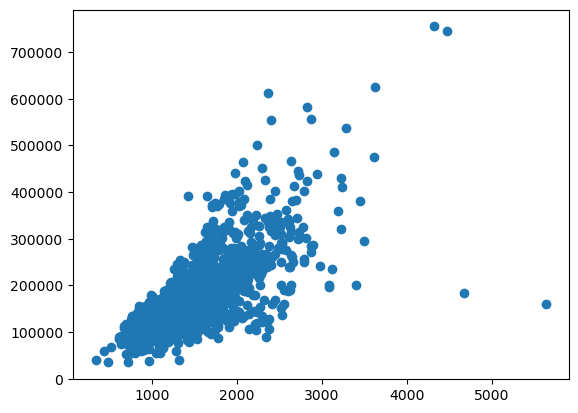

In [146]:
plt.scatter(tdata["GrLivArea"], tdata["SalePrice"])

<Axes: >

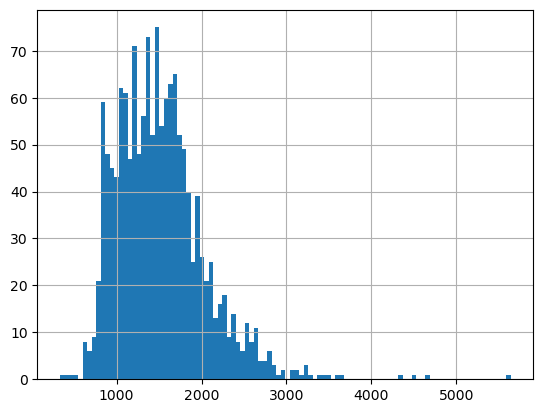

In [147]:
tdata["GrLivArea"].hist(bins=100)

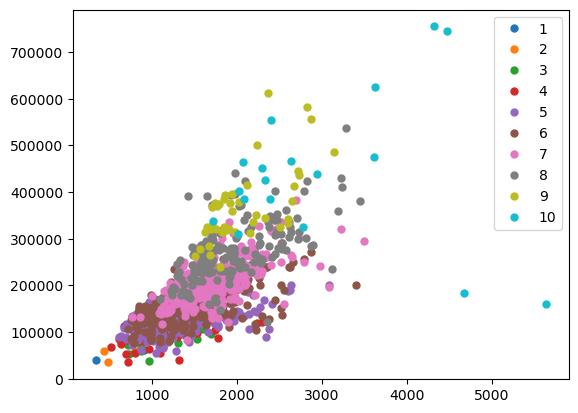

In [157]:
groups = tdata.groupby("OverallQual")
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["GrLivArea"], group["SalePrice"], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

In [158]:
from scipy.stats import zscore


def remove_outlier(df, x):
    df[f'{x}_zscore'] = zscore(df[f'{x}'])
    df.drop(df[(df[f'{x}_zscore'] >= 3) | (df[f'{x}_zscore'] <= -3)].index, inplace=True)
    df.drop(columns=[f'{x}_zscore'], inplace=True)
    
columns = tdata.columns.tolist()
for column in columns:
    remove_outlier(tdata, column)

/var/folders/7c/76rf51gj0r7bjm3s1m7f91500000gn/T/ipykernel_21162/3765356262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_zscore'] = zscore(df[f'{x}'])
/var/folders/7c/76rf51gj0r7bjm3s1m7f91500000gn/T/ipykernel_21162/3765356262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df[f'{x}_zscore'] >= 3) | (df[f'{x}_zscore'] <= -3)].index, inplace=True)
/var/folders/7c/76rf51gj0r7bjm3s1m7f91500000gn/T/ipykernel_21162/3765356262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

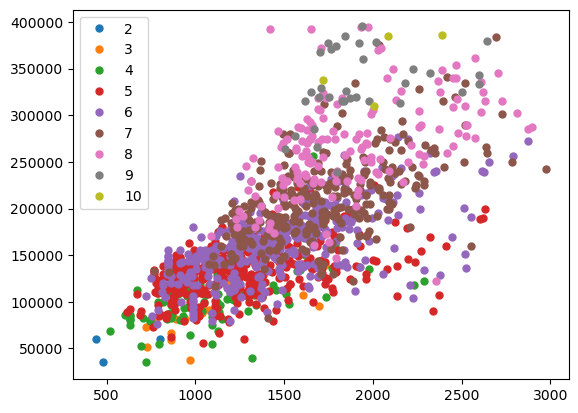

In [159]:
groups = tdata.groupby("OverallQual")
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["GrLivArea"], group["SalePrice"], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()